In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [ ]:
df=pd.read_csv("/content/creditcard.csv")

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265360 entries, 0 to 265359
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    265360 non-null  float64
 1   V1      265360 non-null  float64
 2   V2      265360 non-null  float64
 3   V3      265360 non-null  float64
 4   V4      265360 non-null  float64
 5   V5      265359 non-null  float64
 6   V6      265359 non-null  float64
 7   V7      265359 non-null  float64
 8   V8      265359 non-null  float64
 9   V9      265359 non-null  float64
 10  V10     265359 non-null  float64
 11  V11     265359 non-null  float64
 12  V12     265359 non-null  float64
 13  V13     265359 non-null  float64
 14  V14     265359 non-null  float64
 15  V15     265359 non-null  float64
 16  V16     265359 non-null  float64
 17  V17     265359 non-null  float64
 18  V18     265359 non-null  float64
 19  V19     265359 non-null  float64
 20  V20     265359 non-null  float64
 21  V21     26

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,265360.000000,265360.000000,265360.000000,265360.000000,265360.000000,265359.000000,265359.000000,265359.000000,265359.000000,265359.000000,265359.000000,265359.000000,265359.000000,265359.000000,265359.000000,265359.000000,265359.000000,265359.000000,265359.000000,265359.000000,265359.000000,265359.000000,265359.000000,265359.000000,265359.000000,265359.000000,265359.000000,265359.000000,265359.000000,265359.00000,265359.000000
mean,89547.470105,-0.015027,-0.015417,0.053004,0.012115,-0.021416,0.009235,-0.009290,0.000046,-0.000200,0.001155,0.020828,-0.017382,0.002359,0.008090,0.013179,-0.001761,0.005488,-0.008829,-0.002015,0.001975,-0.000169,-0.005257,-0.002878,0.001353,0.011097,0.001435,-0.000543,0.000771,89.79314,0.001809
std,44872.212760,1.959484,1.659608,1.510432,1.416238,1.370226,1.325277,1.222763,1.194419,1.106003,1.087662,1.025639,1.017120,1.003730,0.963404,0.921733,0.880773,0.856366,0.841064,0.816261,0.775683,0.738277,0.721352,0.630898,0.605937,0.517749,0.483663,0.400250,0.333751,248.80367,0.042492
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-28.009635,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.00000,0.000000
25%,52001.000000,-0.926028,-0.608306,-0.802689,-0.844946,-0.712691,-0.758655,-0.560524,-0.205720,-0.650853,-0.529355,-0.741371,-0.424174,-0.652643,-0.414428,-0.572098,-0.472869,-0.474149,-0.505931,-0.464154,-0.209630,-0.226287,-0.537392,-0.163486,-0.351404,-0.303702,-0.328114,-0.070758,-0.051728,5.99000,0.000000
50%,80078.000000,0.014492,0.059404,0.246511,-0.000964,-0.078180,-0.261375,0.028803,0.025170,-0.054950,-0.090166,-0.016599,0.128690,-0.013127,0.054678,0.068984,0.063753,-0.058035,-0.012292,0.000306,-0.059393,-0.029827,0.003855,-0.014787,0.043739,0.035662,-0.055499,0.001647,0.012608,22.75000,0.000000
75%,132772.000000,1.288993,0.787219,1.067653,0.770970,0.586539,0.411540,0.557327,0.328017,0.602698,0.459308,0.765963,0.613223,0.667355,0.496980,0.671200,0.526431,0.403733,0.492095,0.462721,0.136608,0.181907,0.513282,0.141504,0.436438,0.358218,0.244920,0.089415,0.077830,79.00000,0.000000
max,161851.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.877368,20.007208,15.594995,23.745136,12.018913,7.848392,4.569009,10.526766,5.825654,8.289890,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.53000,1.000000


In [ ]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
x=df.drop("Class",axis=1)

In [ ]:
y=df["Class"]

In [ ]:
pc=PCA(n_components=2,random_state=1)

In [ ]:
components=pc.fit_transform(x,y)

In [ ]:
pc1 = components[:,0]
pc2 = components[:,1]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


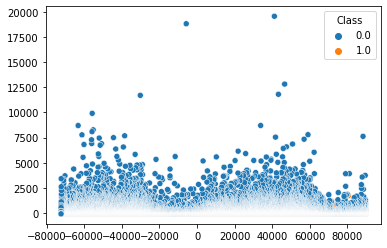

In [ ]:
sns.scatterplot(pc1,pc2,hue=y)

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2, random_state=1)

In [ ]:
ss=StandardScaler()
xtrain_ss=ss.fit_transform(xtrain)
xtest_ss=ss.fit_transform(xtest)

In [ ]:
!pip install imblearn
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=1)
xsample, ysample = rus.fit_resample(xtrain_ss, ytrain)
pd.Series(ysample).value_counts()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1.0    394
0.0    394
dtype: int64

In [ ]:
xtrain_ss.shape

(212287, 30)

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=30, activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy")

In [ ]:
trained_model = model.fit(xsample,ysample,epochs=20,batch_size=64)

Epoch 1/20
13/13 [==============================] - 1s 2ms/step - loss: 0.8752
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 0.5875
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 0.4525
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 0.3396
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 0.2637
Epoch 6/20
13/13 [==============================] - 0s 3ms/step - loss: 0.2204
Epoch 7/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1945
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1796
Epoch 9/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1636
Epoch 10/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1520
Epoch 11/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1426
Epoch 12/20
13/13 [==============================] - 0s 3ms/step - loss: 0.1334
Epoch 13/20
13/13 [==============================

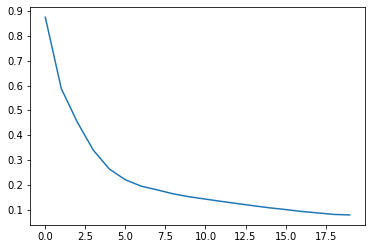

In [ ]:
plt.plot(trained_model.history['loss'])

In [ ]:
ypred = model.predict(xtest)

In [ ]:
ypred = np.where(ypred >= 0.5,1,0)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     52986
         1.0       0.00      0.00      0.00        86

    accuracy                           1.00     53072
   macro avg       0.50      0.50      0.50     53072
weighted avg       1.00      1.00      1.00     53072

